In [76]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
result = requests.get("https://www.imdb.com/chart/top/?ref_=nv_td_mv250")

In [33]:
src = result.content


In [34]:
soup = BeautifulSoup(src, "lxml")


In [39]:

divs = soup.find_all('td', {"class":"titleColumn" })
divs




[<td class="titleColumn">
       1.
       <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>
 <span class="secondaryInfo">(1994)</span>
 </td>,
 <td class="titleColumn">
       2.
       <a href="/title/tt0068646/" title="Francis Ford Coppola (dir.), Marlon Brando, Al Pacino">The Godfather</a>
 <span class="secondaryInfo">(1972)</span>
 </td>,
 <td class="titleColumn">
       3.
       <a href="/title/tt0468569/" title="Christopher Nolan (dir.), Christian Bale, Heath Ledger">The Dark Knight</a>
 <span class="secondaryInfo">(2008)</span>
 </td>,
 <td class="titleColumn">
       4.
       <a href="/title/tt0071562/" title="Francis Ford Coppola (dir.), Al Pacino, Robert De Niro">The Godfather Part II</a>
 <span class="secondaryInfo">(1974)</span>
 </td>,
 <td class="titleColumn">
       5.
       <a href="/title/tt0050083/" title="Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb">12 Angry Men</a>
 <span class="secondaryInfo">(

In [41]:
divs[0].find_all('a')

[<a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>]

In [48]:
movie_names = [div.find('a').string for div in divs]
movie_names

['The Shawshank Redemption',
 'The Godfather',
 'The Dark Knight',
 'The Godfather Part II',
 '12 Angry Men',
 "Schindler's List",
 'The Lord of the Rings: The Return of the King',
 'Pulp Fiction',
 'The Lord of the Rings: The Fellowship of the Ring',
 'Il buono, il brutto, il cattivo',
 'Forrest Gump',
 'Fight Club',
 'The Lord of the Rings: The Two Towers',
 'Inception',
 'The Empire Strikes Back',
 'The Matrix',
 'GoodFellas',
 "One Flew Over the Cuckoo's Nest",
 'Se7en',
 'Shichinin no samurai',
 "It's a Wonderful Life",
 'The Silence of the Lambs',
 'Cidade de Deus',
 'Saving Private Ryan',
 'Interstellar',
 'La vita è bella',
 'The Green Mile',
 'Star Wars',
 'Terminator 2: Judgment Day',
 'Back to the Future',
 'Sen to Chihiro no kamikakushi',
 'The Pianist',
 'Psycho',
 'Gisaengchung',
 'Léon',
 'The Lion King',
 'Gladiator',
 'American History X',
 'The Departed',
 'The Usual Suspects',
 'The Prestige',
 'Whiplash',
 'Casablanca',
 'Hotaru no haka',
 'Seppuku',
 'The Intouchab

In [51]:
movie_year = [div.find('span',class_ = 'secondaryInfo').string[1:-1]for div in divs]
movie_year

['1994',
 '1972',
 '2008',
 '1974',
 '1957',
 '1993',
 '2003',
 '1994',
 '2001',
 '1966',
 '1994',
 '1999',
 '2002',
 '2010',
 '1980',
 '1999',
 '1990',
 '1975',
 '1995',
 '1954',
 '1946',
 '1991',
 '2002',
 '1998',
 '2014',
 '1997',
 '1999',
 '1977',
 '1991',
 '1985',
 '2001',
 '2002',
 '1960',
 '2019',
 '1994',
 '1994',
 '2000',
 '1998',
 '2006',
 '1995',
 '2006',
 '2014',
 '1942',
 '1988',
 '1962',
 '2011',
 '1936',
 '1968',
 '1954',
 '1988',
 '1979',
 '1931',
 '1979',
 '2000',
 '2012',
 '1981',
 '2008',
 '2006',
 '1950',
 '1957',
 '1980',
 '1940',
 '2018',
 '1957',
 '1986',
 '2018',
 '1999',
 '1964',
 '2012',
 '2003',
 '2009',
 '1984',
 '2017',
 '1995',
 '2019',
 '1995',
 '1981',
 '2019',
 '1997',
 '1984',
 '1997',
 '2016',
 '2009',
 '1952',
 '2000',
 '2010',
 '1963',
 '2018',
 '1983',
 '2004',
 '1968',
 '1992',
 '1985',
 '2012',
 '1941',
 '1931',
 '1962',
 '1959',
 '1958',
 '1952',
 '2001',
 '1960',
 '1971',
 '1944',
 '1987',
 '1983',
 '2022',
 '2020',
 '2010',
 '1962',
 '1995',
 

In [52]:
movie_year=[int(movie_year) for movie_year in movie_year]
movie_year

[1994,
 1972,
 2008,
 1974,
 1957,
 1993,
 2003,
 1994,
 2001,
 1966,
 1994,
 1999,
 2002,
 2010,
 1980,
 1999,
 1990,
 1975,
 1995,
 1954,
 1946,
 1991,
 2002,
 1998,
 2014,
 1997,
 1999,
 1977,
 1991,
 1985,
 2001,
 2002,
 1960,
 2019,
 1994,
 1994,
 2000,
 1998,
 2006,
 1995,
 2006,
 2014,
 1942,
 1988,
 1962,
 2011,
 1936,
 1968,
 1954,
 1988,
 1979,
 1931,
 1979,
 2000,
 2012,
 1981,
 2008,
 2006,
 1950,
 1957,
 1980,
 1940,
 2018,
 1957,
 1986,
 2018,
 1999,
 1964,
 2012,
 2003,
 2009,
 1984,
 2017,
 1995,
 2019,
 1995,
 1981,
 2019,
 1997,
 1984,
 1997,
 2016,
 2009,
 1952,
 2000,
 2010,
 1963,
 2018,
 1983,
 2004,
 1968,
 1992,
 1985,
 2012,
 1941,
 1931,
 1962,
 1959,
 1958,
 1952,
 2001,
 1960,
 1971,
 1944,
 1987,
 1983,
 2022,
 2020,
 2010,
 1962,
 1995,
 1973,
 2009,
 2011,
 1927,
 1976,
 1997,
 1988,
 2000,
 1989,
 1948,
 2007,
 2019,
 2004,
 2016,
 1965,
 2005,
 1921,
 1959,
 2020,
 1950,
 2013,
 2018,
 1961,
 1995,
 1985,
 2006,
 1998,
 2007,
 1992,
 1999,
 2010,
 2001,

In [57]:

movie_rating = soup.find_all('td', {"class":"ratingColumn imdbRating" })
movie_rating



[<td class="ratingColumn imdbRating">
 <strong title="9.2 based on 2,701,357 user ratings">9.2</strong>
 </td>,
 <td class="ratingColumn imdbRating">
 <strong title="9.2 based on 1,875,317 user ratings">9.2</strong>
 </td>,
 <td class="ratingColumn imdbRating">
 <strong title="9.0 based on 2,675,183 user ratings">9.0</strong>
 </td>,
 <td class="ratingColumn imdbRating">
 <strong title="9.0 based on 1,281,258 user ratings">9.0</strong>
 </td>,
 <td class="ratingColumn imdbRating">
 <strong title="9.0 based on 797,941 user ratings">9.0</strong>
 </td>,
 <td class="ratingColumn imdbRating">
 <strong title="8.9 based on 1,365,546 user ratings">8.9</strong>
 </td>,
 <td class="ratingColumn imdbRating">
 <strong title="8.9 based on 1,860,142 user ratings">8.9</strong>
 </td>,
 <td class="ratingColumn imdbRating">
 <strong title="8.8 based on 2,073,718 user ratings">8.8</strong>
 </td>,
 <td class="ratingColumn imdbRating">
 <strong title="8.8 based on 1,889,501 user ratings">8.8</strong>
 <

In [72]:
movie_rating = [movie_rating.find('strong').string for movie_rating in movie_rating]
movie_rating

['9.2',
 '9.2',
 '9.0',
 '9.0',
 '9.0',
 '8.9',
 '8.9',
 '8.8',
 '8.8',
 '8.8',
 '8.8',
 '8.7',
 '8.7',
 '8.7',
 '8.7',
 '8.7',
 '8.7',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.6',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.4',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.3',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',
 '8.2',


In [74]:
movie_rating=[float(movie_rating) for movie_rating in movie_rating]
movie_rating

[9.2,
 9.2,
 9.0,
 9.0,
 9.0,
 8.9,
 8.9,
 8.8,
 8.8,
 8.8,
 8.8,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.4,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.3,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.2,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1

In [67]:
df = pd.DataFrame()

In [75]:
df['Title'] = movie_names
df['Year'] = movie_year
df['Rate'] = movie_rating
df

,Title,Year,Rate
0,The Shawshank Redemption,1994,9.2
1,The Godfather,1972,9.2
2,The Dark Knight,2008,9.0
3,The Godfather Part II,1974,9.0
4,12 Angry Men,1957,9.0
...,...,...,...
245,Dersu Uzala,1975,8.0
246,The Help,2011,8.0
247,Aladdin,1992,8.0
248,Gandhi,1982,8.0


In [139]:
tx = pd.DataFrame()
tx = df.nlargest(5, ['Rate'])
tx

,Title,Year,Rate
0,The Shawshank Redemption,1994,9.2
1,The Godfather,1972,9.2
2,The Dark Knight,2008,9.0
3,The Godfather Part II,1974,9.0
4,12 Angry Men,1957,9.0


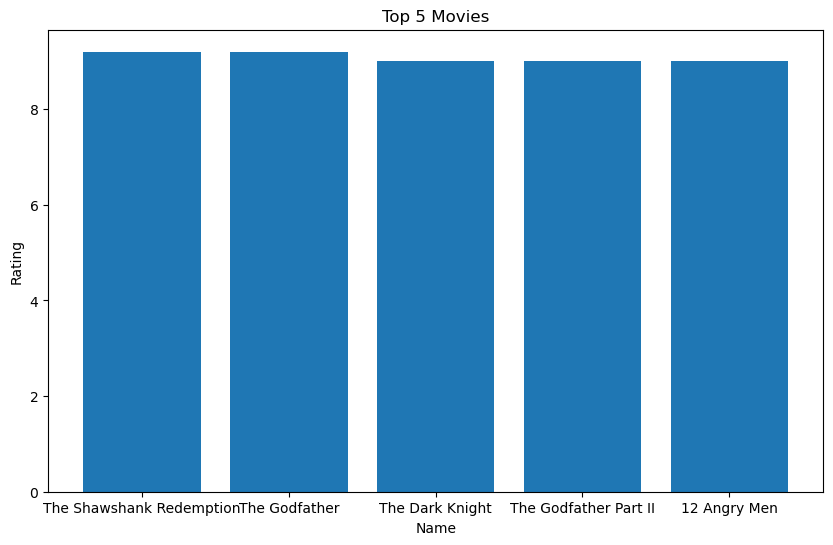

In [142]:
plt.figure(figsize=(10 , 6))

plt.bar(tx['Title'],tx['Rate'])
plt.title('Top 5 Movies')
plt.xlabel('Name' )
plt.ylabel('Rating')
plt.show()

In [126]:
film_count_yearly = df.Year.value_counts(ascending=True)
years = df.groupby('Year',as_index=False).sum()['Year']

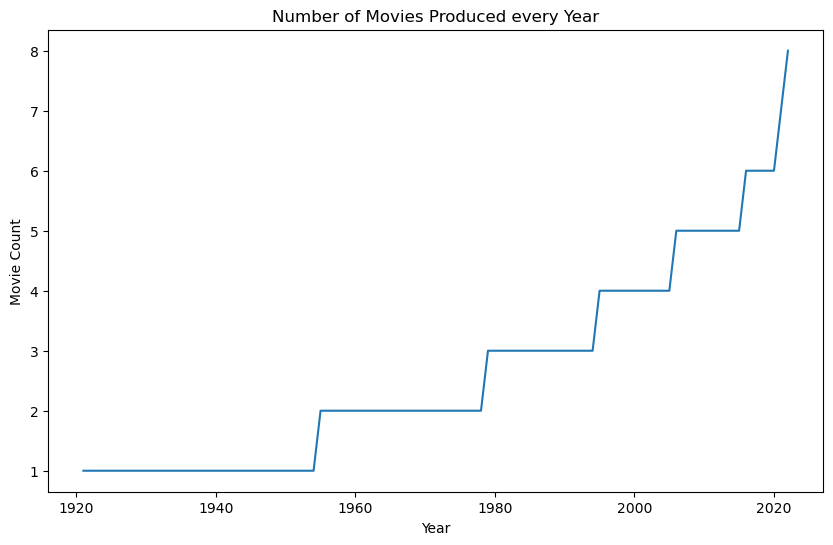

In [143]:
plt.figure(figsize=(10 , 6))
plt.plot(years,film_count_yearly)

plt.xlabel('Year')
plt.ylabel('Movie Count')
plt.title('Number of Movies Produced every Year')

plt.show()

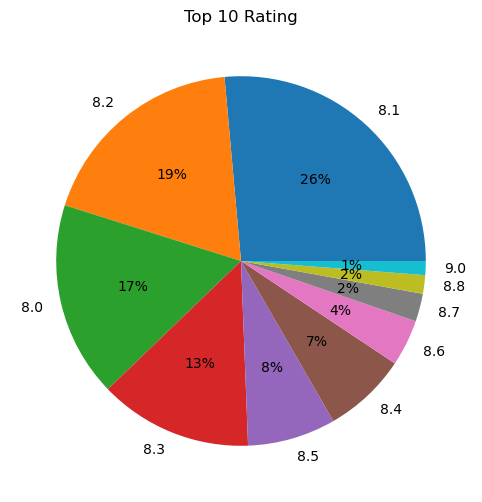

In [144]:
plt.figure(figsize=(10 , 6))
tx = df['Rate'].value_counts(ascending=False).head(10)
td = df['Rate'].value_counts(ascending=False).keys()[:10]
plt.pie(x = tx, labels= td, autopct='%1.0f%%')
plt.title('Top 10 Rating')
plt.show()